In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('DL-6_NSE-TATAGLOBAL.csv')

In [3]:
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [4]:
df.shape

(2035, 8)

In [13]:
train =df.iloc[:,1:2].values

In [14]:
train

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [15]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler(feature_range=(0,1))
train=mm.fit_transform(train)

In [16]:
train

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

In [17]:
xtrain=[]
ytrain=[]
for i in range(60,2035):
    xtrain.append(train[i-60:i,0])
    ytrain.append(train[i,0])
xtrain,ytrain=np.array(xtrain),np.array(ytrain)    

In [18]:
xtrain.shape

(1975, 60)

In [19]:
ytrain.shape

(1975,)

In [20]:
xtrain

array([[0.6202352 , 0.62226277, 0.64436334, ..., 0.79622871, 0.81062449,
        0.74371452],
       [0.62226277, 0.64436334, 0.61719384, ..., 0.81062449, 0.74371452,
        0.77007299],
       [0.64436334, 0.61719384, 0.61820762, ..., 0.74371452, 0.77007299,
        0.73641525],
       ...,
       [0.19870235, 0.21796431, 0.21553122, ..., 0.14963504, 0.14801298,
        0.15815085],
       [0.21796431, 0.21553122, 0.20600162, ..., 0.14801298, 0.15815085,
        0.16504461],
       [0.21553122, 0.20600162, 0.21654501, ..., 0.15815085, 0.16504461,
        0.15896188]])

In [23]:
xtrain=np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))

In [24]:
xtrain.shape

(1975, 60, 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM, Dropout

In [77]:
model=Sequential()
# Add first LSTM Layer
model.add(LSTM(units=50,return_sequences=True,input_shape=(xtrain.shape[1],1)))
model.add(Dropout(0.2))

# Add second LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Add third LSTM Layer
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# Add fourth LSTM Layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_5 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_6 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 50)               

In [79]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [80]:
model.fit(xtrain,ytrain,epochs=10)

Epoch 1/10
62/62 [==============================] - 23s 169ms/step - loss: 0.0113
Epoch 2/10
62/62 [==============================] - 10s 155ms/step - loss: 0.0031
Epoch 3/10
62/62 [==============================] - 9s 145ms/step - loss: 0.0028
Epoch 4/10
62/62 [==============================] - 9s 142ms/step - loss: 0.0025
Epoch 5/10
62/62 [==============================] - 11s 183ms/step - loss: 0.0022
Epoch 6/10
62/62 [==============================] - 12s 197ms/step - loss: 0.0023
Epoch 7/10
62/62 [==============================] - 11s 170ms/step - loss: 0.0023
Epoch 8/10
62/62 [==============================] - 10s 159ms/step - loss: 0.0024
Epoch 9/10
62/62 [==============================] - 11s 173ms/step - loss: 0.0020
Epoch 10/10
62/62 [==============================] - 10s 168ms/step - loss: 0.0020


In [81]:
tset=pd.read_csv('DL-6_tatatest.csv')

In [82]:
tset.shape

(16, 8)

In [83]:
tset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-24,220.10,221.25,217.05,219.55,219.80,2171956,4771.34
1,2018-10-23,221.10,222.20,214.75,219.55,218.30,1416279,3092.15
2,2018-10-22,229.45,231.60,222.00,223.05,223.25,3529711,8028.37
3,2018-10-19,230.30,232.70,225.50,227.75,227.20,1527904,3490.78
4,2018-10-17,237.70,240.80,229.45,231.30,231.10,2945914,6961.65
5,2018-10-16,237.10,237.70,233.05,234.40,235.45,1723113,4052.25
6,2018-10-15,229.70,237.00,226.80,234.80,234.90,1224339,2845.68
7,2018-10-12,226.25,232.35,225.50,228.70,229.10,1165527,2675.91
8,2018-10-11,215.00,229.70,215.00,225.60,224.60,1293881,2890.85
9,2018-10-10,215.00,229.65,215.00,228.25,228.40,2919278,6557.95


In [84]:
test=tset.iloc[:,1:2].values

In [85]:
test

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [102]:
total=pd.concat((df['Open'],tset['Open']),axis=0)

In [103]:
total

0     234.05
1     234.55
2     240.00
3     233.30
4     233.55
       ...  
11    208.00
12    217.00
13    223.50
14    230.00
15    234.55
Name: Open, Length: 2051, dtype: float64

In [104]:
total.shape

(2051,)

In [105]:
tset.shape

(16, 8)

In [106]:
inputs=total[len(total)-len(tset)-60:].values

In [107]:
inputs.shape

(76,)

In [108]:
inputs

array([131.9 , 134.5 , 134.5 , 134.75, 130.1 , 128.  , 125.  , 124.4 ,
       121.3 , 122.3 , 123.3 , 124.6 , 126.35, 123.45, 121.6 , 123.  ,
       124.55, 122.5 , 122.8 , 124.  , 124.85, 126.15, 128.5 , 127.7 ,
       128.  , 124.  , 123.25, 122.5 , 124.2 , 121.65, 117.  , 118.8 ,
       119.  , 118.2 , 116.  , 118.45, 114.  , 112.  , 110.  , 110.15,
       111.9 , 115.95, 113.4 , 113.  , 113.75, 112.9 , 112.  , 114.1 ,
       117.  , 118.5 , 118.3 , 117.3 , 116.5 , 112.5 , 118.  , 117.6 ,
       120.1 , 121.8 , 120.3 , 122.1 , 220.1 , 221.1 , 229.45, 230.3 ,
       237.7 , 237.1 , 229.7 , 226.25, 215.  , 215.  , 215.5 , 208.  ,
       217.  , 223.5 , 230.  , 234.55])

In [109]:
inputs = inputs.reshape(-1,1)
inputs = mm.transform(inputs)

In [110]:
xtest=[]
for i in range(60,76):
    xtest.append(inputs[i-60:i,0])
xtest=np.array(xtest) 
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [111]:
xtest.shape

(16, 60, 1)

In [112]:
pred=model.predict(xtest)
pred=mm.inverse_transform(pred)

1/1 [==============================] - 0s 59ms/step


In [113]:
pred

array([[116.21663 ],
       [117.544975],
       [120.54639 ],
       [125.78762 ],
       [133.42073 ],
       [143.25943 ],
       [154.79709 ],
       [167.24315 ],
       [179.7099  ],
       [191.2865  ],
       [201.2829  ],
       [209.30882 ],
       [215.16975 ],
       [218.99597 ],
       [221.14842 ],
       [222.1136  ]], dtype=float32)

In [114]:
test

array([[220.1 ],
       [221.1 ],
       [229.45],
       [230.3 ],
       [237.7 ],
       [237.1 ],
       [229.7 ],
       [226.25],
       [215.  ],
       [215.  ],
       [215.5 ],
       [208.  ],
       [217.  ],
       [223.5 ],
       [230.  ],
       [234.55]])

In [115]:
pred

array([[116.21663 ],
       [117.544975],
       [120.54639 ],
       [125.78762 ],
       [133.42073 ],
       [143.25943 ],
       [154.79709 ],
       [167.24315 ],
       [179.7099  ],
       [191.2865  ],
       [201.2829  ],
       [209.30882 ],
       [215.16975 ],
       [218.99597 ],
       [221.14842 ],
       [222.1136  ]], dtype=float32)

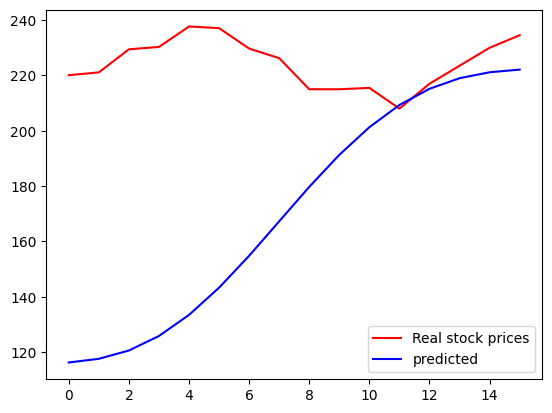

In [116]:
plt.plot(test,label='Real stock prices',color='red')
plt.plot(pred,color='blue',label='predicted')
plt.legend()
plt.show()